In [8]:

import pandas as pd

# Read in the data
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

save_path = 'C:\\Users\\aoife\Documents\\Project\\'

# Read in merged file
df = pd.read_csv(folder_path + 'activity_and_survey_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons'])

print(df.head(5))

                          participantId  bodyMass_kg  height_m        bmi  \
0  00a55fb5-da33-4e2e-ae61-28f589fcc174       51.256    1.5748  20.667783   
1  00fd4039-9b5e-4bbb-8295-4983a3f58371       59.874    1.6510  21.965653   
2  02d5125e-684f-4166-a3b7-5df1bcfc1661       59.874    1.7018  20.673844   
3  080292d4-a0b0-4dd7-a7dd-191c8ac71664       77.111    1.8034  23.710036   
4  080bacc1-4661-4735-acca-7d27ad1a4192       90.718    1.8034  27.893906   

   mean_hr/s  hr_duration_(s)  max_hr  min_hr  totalSteps  stepsTotalDuration  \
0   1.438426             47.0   1.783   1.017      4454.0              6366.0   
1   1.290195             41.0   1.517   1.150        61.0              1441.0   
2   1.107266             64.0   1.783   0.617     10790.0             20098.0   
3   1.056040            176.0   1.967   0.850      3819.0              7895.0   
4   1.179194             72.0   1.883   0.900     12734.0             14412.0   

   ...  wake_up_choices  wake_ups  weekly_naps  no

In [9]:
# Train test split

from sklearn.model_selection import GroupKFold

gkf = GroupKFold(n_splits=10)

In [10]:
# X - features

X = df[['bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','stepsTotalDuration','totalDistance','dwrTotalDuration', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']].values

# y - target
y = df['ssq_score'].values

groups = df['participantId'].values

In [11]:
# import linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the Random Forest Regressor model
model = LinearRegression()

# Lists to store evaluation metrics
train_scores = []
test_scores = []
train_predicted_vals = []
train_actual_vals = []
test_predicted_vals = []
test_actual_vals = []

In [13]:

column_names = ['participantId','bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','stepsTotalDuration','totalDistance','dwrTotalDuration', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'actual_ssq', 'prediction']

all_predictions_df = pd.DataFrame(columns=column_names)

# Train model

for i, (train_index, test_index) in enumerate(gkf.split(X, y, groups)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    train_scores.append(train_rmse)

    # Evaluate on test data

    test_pred = model.predict(X_test)
    test_rmse = mean_squared_error(y_test, test_pred, squared=False)
    test_scores.append(test_rmse)

    # Predicted and actual values
    train_predicted_vals.extend(train_pred)
    train_actual_vals.extend(y_train)
    test_predicted_vals.extend(test_pred)
    test_actual_vals.extend(y_test)

    for i, prediction in enumerate(test_pred):
        print(f"Predicted: {prediction:.2f}, features: {X_test[i]}")

    # Dataframe to store predcitions for this fold

    fold_predictions_df = pd.DataFrame(columns=column_names)
    fold_predictions_df['participantId'] = groups[test_index]
    fold_predictions_df.iloc[:, 1:len(column_names) - 2] = X_test
    fold_predictions_df['actual_ssq'] = y_test
    fold_predictions_df['prediction'] = test_pred

    all_predictions_df = pd.concat([all_predictions_df, fold_predictions_df], ignore_index=True)


# Average scores
avg_train_mse = sum(train_scores)/len(train_scores)
avg_test_mse = sum(test_scores)/len(test_scores)

print("Average Train RMSE:", avg_train_mse)
print("Average Test RMSE: ", avg_test_mse)




Predicted: 4.41, features: [9.25330000e+01 1.88806667e+00 2.59574480e+01 9.78324675e-01
 7.70000000e+01 1.18300000e+00 7.00000000e-01 1.09670000e+04
 1.42510000e+04 3.18861100e+03 8.36300000e+03 1.00000000e+00
 4.00000000e+00 2.00000000e+00 8.00000000e+00 3.00000000e+00
 5.00000000e+00 1.00000000e+00 2.00000000e+00 5.00000000e+00
 1.00000000e+00 2.00000000e+00 1.00000000e+00 5.00000000e+00
 3.00000000e+00 3.00000000e+00 4.00000000e+00 0.00000000e+00
 1.00000000e+00 3.00000000e+00 5.00000000e+00 2.00000000e+00
 1.00000000e+00 3.00000000e+00 0.00000000e+00 7.00000000e+00
 1.00000000e+00 6.50000000e+00 6.50000000e+00 2.00000000e+00
 0.00000000e+00 5.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00]
Predicted: 4.19, features: [9.25330000e+01 1.88806667e+00 2.59574480e+01 1.05027692e+00
 1.95000000e+02 1.80000000e+00 8.50000000e-01 9.72800000e+03
 2.65190000e+04 8.53020100e+03 2.81720000e+04 1.00000000e+00
 4.00000000e+0

In [14]:
# print predictions df

print(all_predictions_df.head(10))

# save to csv

all_predictions_df.to_csv(save_path + 'linear_regression_predictions.csv', index=False)

                          participantId bodyMass_kg  height_m        bmi  \
0  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
1  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
2  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
3  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
4  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
5  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
6  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
7  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
8  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
9  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   

  mean_hr/s hr_duration_(s) max_hr min_hr totalSteps stepsTotalDuration  ...  \
0  0.978325            77.0  1.183    0.7    10967.0            14251.0  ...   
1  

(0.8, 10.837040263210945)


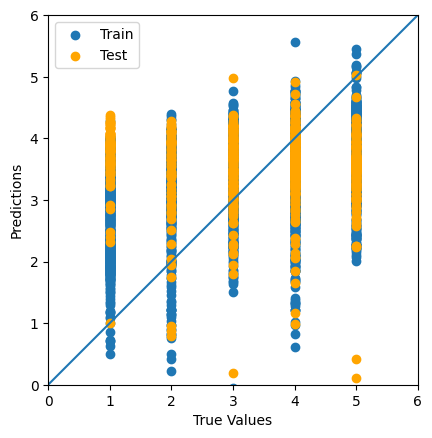

In [ ]:
# Plot the results

import matplotlib.pyplot as plt

plt.scatter(train_actual_vals, train_predicted_vals, label = 'Train')
plt.scatter(test_actual_vals, test_predicted_vals, label= 'Test', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
print(plt.xlim())
plt.xlim([0,6])
plt.ylim([0,6])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()


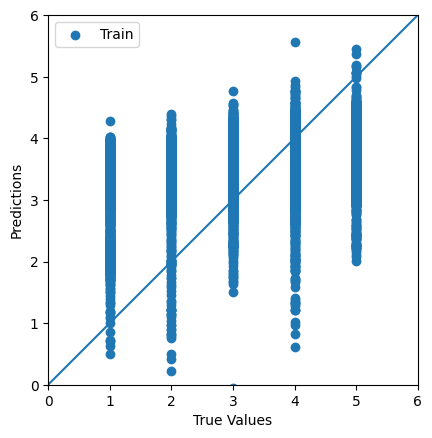

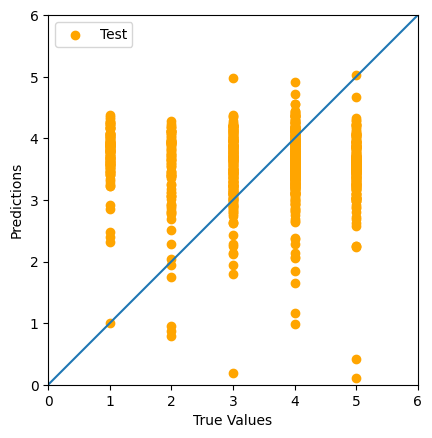

In [ ]:
# Separate plots

import matplotlib.pyplot as plt

plt.scatter(train_actual_vals, train_predicted_vals, label = 'Train')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,6])
plt.ylim([0,6])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()


plt.scatter(test_actual_vals, test_predicted_vals, label= 'Test', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,6])
plt.ylim([0,6])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()
